In [1]:
from ray.rllib.utils.framework import try_import_tf
tf1, tf, tfv = try_import_tf()
tf1.enable_eager_execution()

/opt/homebrew/Caskroom/mambaforge/base/envs/esc-m1/lib/python3.10/site-packages/tensorflow/core/framework/tensor_shape_pb2.py:18: DeprecationWarning: Call to deprecated create function FileDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  DESCRIPTOR = _descriptor.FileDescriptor(
/opt/homebrew/Caskroom/mambaforge/base/envs/esc-m1/lib/python3.10/site-packages/tensorflow/core/framework/tensor_shape_pb2.py:36: DeprecationWarning: Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  _descriptor.FieldDescriptor(
/opt/homebrew/Caskroom/mambaforge/base/envs/esc-m1/lib/python3.10/site-packages/tensorflow/core/framework/tensor_shape_pb2.py:29: DeprecationWarning: Call to deprecated create function Descriptor(). Note: Create unlinked descriptors is going to 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ray
from ray.rllib.algorithms.algorithm import Algorithm

from esc.epanet_env import EPANETEnv


In [3]:
algo = Algorithm.from_checkpoint('/Users/maxdumas/ray_results/PPO_EPANETEnv_2022-12-02_17-06-43qqr4qq9k/checkpoint_000031')

2022-12-03 09:17:29,718	WARNING deprecation.py:47 -- DeprecationWarning: `simple_optimizer` has been deprecated. This will raise an error in the future!
2022-12-03 09:17:29,719	WARNING algorithm.py:2531 -- You have specified 1 evaluation workers, but your `evaluation_interval` is None! Therefore, evaluation will not occur automatically with each call to `Algorithm.train()`. Instead, you will have to call `Algorithm.evaluate()` manually in order to trigger an evaluation run.


Metal device set to: Apple M1 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB



2022-12-03 09:17:31,436	INFO worker.py:1528 -- Started a local Ray instance.
(pid=49557) /opt/homebrew/Caskroom/mambaforge/base/envs/esc-m1/lib/python3.10/site-packages/tensorflow/core/framework/tensor_shape_pb2.py:18: DeprecationWarning: Call to deprecated create function FileDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
(pid=49557)   DESCRIPTOR = _descriptor.FileDescriptor(
(pid=49557) /opt/homebrew/Caskroom/mambaforge/base/envs/esc-m1/lib/python3.10/site-packages/tensorflow/core/framework/tensor_shape_pb2.py:36: DeprecationWarning: Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
(pid=49557)   _descriptor.FieldDescriptor(
(pid=49557) /opt/homebrew/Caskroom/mambaforge/base/envs/esc-m1/lib/python3.10/site-packages/tensorflow/core/framework/te

(RolloutWorker pid=49559) EPANET version 20200 loaded (EPyT version 1.0.1).
(RolloutWorker pid=49559) Input File BUILDING.inp loaded successfully.
(RolloutWorker pid=49559) 
(RolloutWorker pid=49559) Metal device set to: Apple M1 Max
(RolloutWorker pid=49559) 
(RolloutWorker pid=49559) systemMemory: 64.00 GB
(RolloutWorker pid=49559) maxCacheSize: 24.00 GB
(RolloutWorker pid=49559) 
(RolloutWorker pid=49562) EPANET version 20200 loaded (EPyT version 1.0.1).
(RolloutWorker pid=49562) Input File BUILDING.inp loaded successfully.
(RolloutWorker pid=49562) 
(RolloutWorker pid=49562) Metal device set to: Apple M1 Max
(RolloutWorker pid=49562) 
(RolloutWorker pid=49562) systemMemory: 64.00 GB
(RolloutWorker pid=49562) maxCacheSize: 24.00 GB
(RolloutWorker pid=49562) 
(RolloutWorker pid=49555) EPANET version 20200 loaded (EPyT version 1.0.1).
(RolloutWorker pid=49558) EPANET version 20200 loaded (EPyT version 1.0.1).
(RolloutWorker pid=49558) Input File BUILDING.inp loaded successfully.
(Roll

(pid=49621) /opt/homebrew/Caskroom/mambaforge/base/envs/esc-m1/lib/python3.10/site-packages/tensorflow/core/framework/tensor_shape_pb2.py:18: DeprecationWarning: Call to deprecated create function FileDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
(pid=49621)   DESCRIPTOR = _descriptor.FileDescriptor(
(pid=49621) /opt/homebrew/Caskroom/mambaforge/base/envs/esc-m1/lib/python3.10/site-packages/tensorflow/core/framework/tensor_shape_pb2.py:36: DeprecationWarning: Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
(pid=49621)   _descriptor.FieldDescriptor(
(pid=49621) /opt/homebrew/Caskroom/mambaforge/base/envs/esc-m1/lib/python3.10/site-packages/tensorflow/core/framework/tensor_shape_pb2.py:29: DeprecationWarning: Call to deprecated create function 

(RolloutWorker pid=49621) EPANET version 20200 loaded (EPyT version 1.0.1).
(RolloutWorker pid=49621) Input File BUILDING.inp loaded successfully.
(RolloutWorker pid=49621) 
(RolloutWorker pid=49621) Metal device set to: Apple M1 Max
(RolloutWorker pid=49621) 
(RolloutWorker pid=49621) systemMemory: 64.00 GB
(RolloutWorker pid=49621) maxCacheSize: 24.00 GB
(RolloutWorker pid=49621) 


2022-12-03 09:17:43,293	INFO trainable.py:164 -- Trainable.setup took 13.579 seconds. If your trainable is slow to initialize, consider setting reuse_actors=True to reduce actor creation overheads.


In [4]:
algo.get_policy().config["model"]

{'_use_default_native_models': False,
 '_disable_preprocessor_api': False,
 '_disable_action_flattening': False,
 'fcnet_hiddens': [256, 256],
 'fcnet_activation': 'relu',
 'conv_filters': None,
 'conv_activation': 'relu',
 'post_fcnet_hiddens': [],
 'post_fcnet_activation': 'relu',
 'free_log_std': False,
 'no_final_linear': False,
 'vf_share_layers': False,
 'use_lstm': True,
 'max_seq_len': 20,
 'lstm_cell_size': 256,
 'lstm_use_prev_action': False,
 'lstm_use_prev_reward': False,
 '_time_major': False,
 'use_attention': False,
 'attention_num_transformer_units': 1,
 'attention_dim': 64,
 'attention_num_heads': 1,
 'attention_head_dim': 32,
 'attention_memory_inference': 50,
 'attention_memory_training': 50,
 'attention_position_wise_mlp_dim': 32,
 'attention_init_gru_gate_bias': 2.0,
 'attention_use_n_prev_actions': 0,
 'attention_use_n_prev_rewards': 0,
 'framestack': True,
 'dim': 84,
 'grayscale': False,
 'zero_mean': True,
 'custom_model': None,
 'custom_model_config': {},
 'cu

In [5]:
env = EPANETEnv({})
obs = env.reset()
done = False
O = []
A = []
R = []

Z = np.zeros(algo.get_policy().config["model"]["lstm_cell_size"], np.float32)
state=[Z, Z] 

while not done:
    action = algo.compute_single_action(observation=obs, state=state, full_fetch=True)
    state = action[1]
    obs, reward, done, _ = env.step(action[0])
    tank_head = obs[-3]
    O.append(obs)
    A.append(action[0])
    R.append(reward)

O = np.array(O)
A = np.array(A)
R = np.array(R)

algo.stop()

EPANET version 20200 loaded (EPyT version 1.0.1).
Input File BUILDING.inp loaded successfully.

Close toolkit for the input file "BUILDING". EPANET Toolkit is unloaded.

Hydraulic Analysis completed succesfully.


In [6]:
plt.rcParams['figure.figsize'] = [8.0, 4.0]
plt.rcParams['figure.dpi'] = 140

Text(0.5, 1.0, 'Pump Energy Cost')

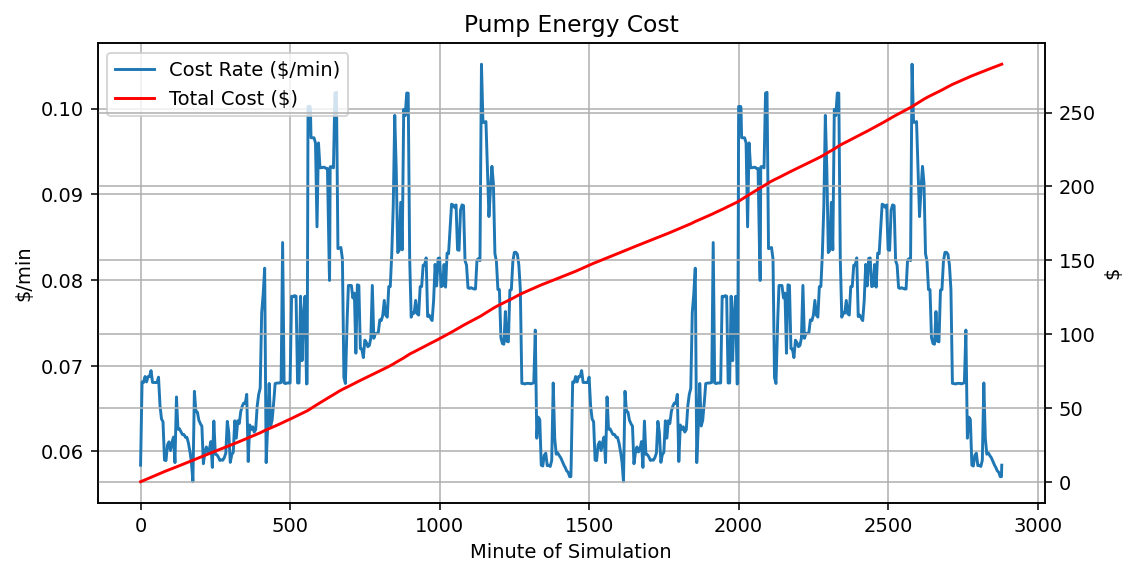

In [7]:
fig, ax1 = plt.subplots()
ln1 = ax1.plot(O[:, 0] * A, label="Cost Rate ($/min)")
ax2 = ax1.twinx()
ln2 = ax2.plot(O[:, -2], label="Total Cost ($)", color="r")
ax2.grid()
ax1.grid()
ax1.legend(ln1 + ln2, [l.get_label() for l in ln1 + ln2], loc=2)
ax1.set_xlabel("Minute of Simulation")
ax1.set_ylabel("$/min")
ax2.set_ylabel("$")
plt.title("Pump Energy Cost")

Text(0.5, 1.0, 'Tank Head (m)')

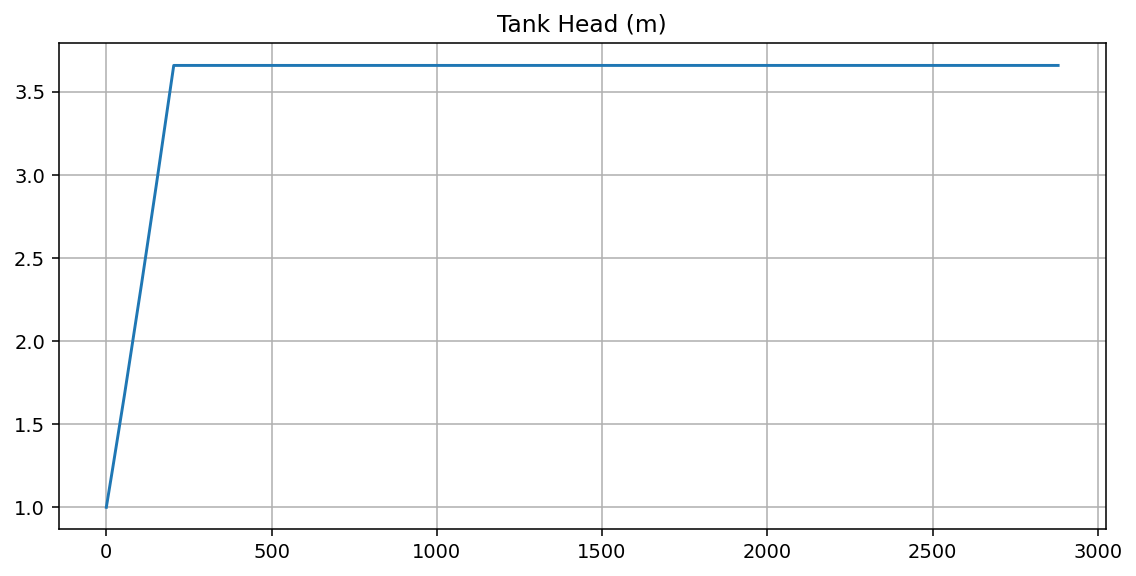

In [8]:
plt.plot(O[:, -3])
plt.grid()
plt.title("Tank Head (m)")

Text(0.5, 1.0, 'Number of Pump Actions')

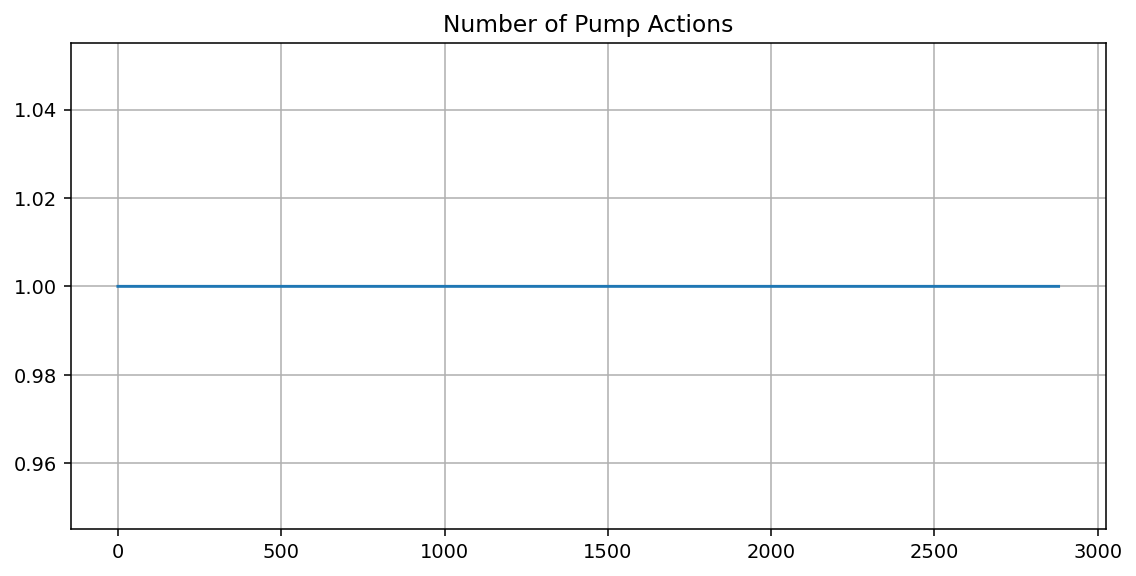

In [9]:
plt.plot(O[:, -1])
plt.grid()
plt.title("Number of Pump Actions")

Text(0.5, 1.0, 'Reward')

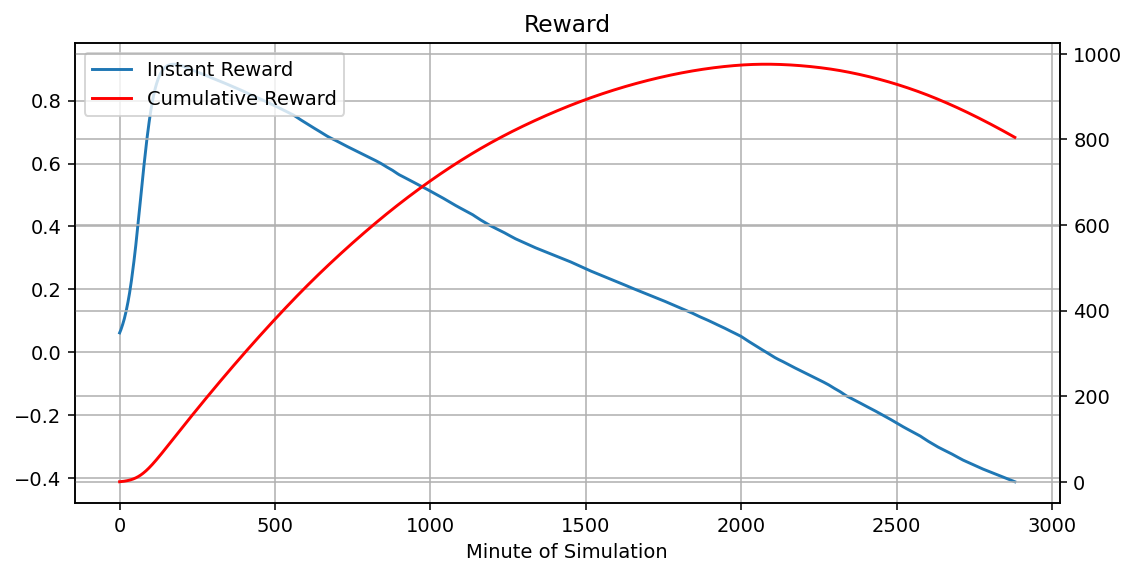

In [10]:
fig, ax1 = plt.subplots()
ln1 = ax1.plot(R, label="Instant Reward")
ax2 = ax1.twinx()
ln2 = ax2.plot(np.cumsum(R), label="Cumulative Reward", color="r")
ax2.grid()
ax1.grid()
ax1.legend(ln1 + ln2, [l.get_label() for l in ln1 + ln2], loc=2)
ax1.set_xlabel("Minute of Simulation")
plt.title("Reward")

Text(0.5, 1.0, 'Reward')

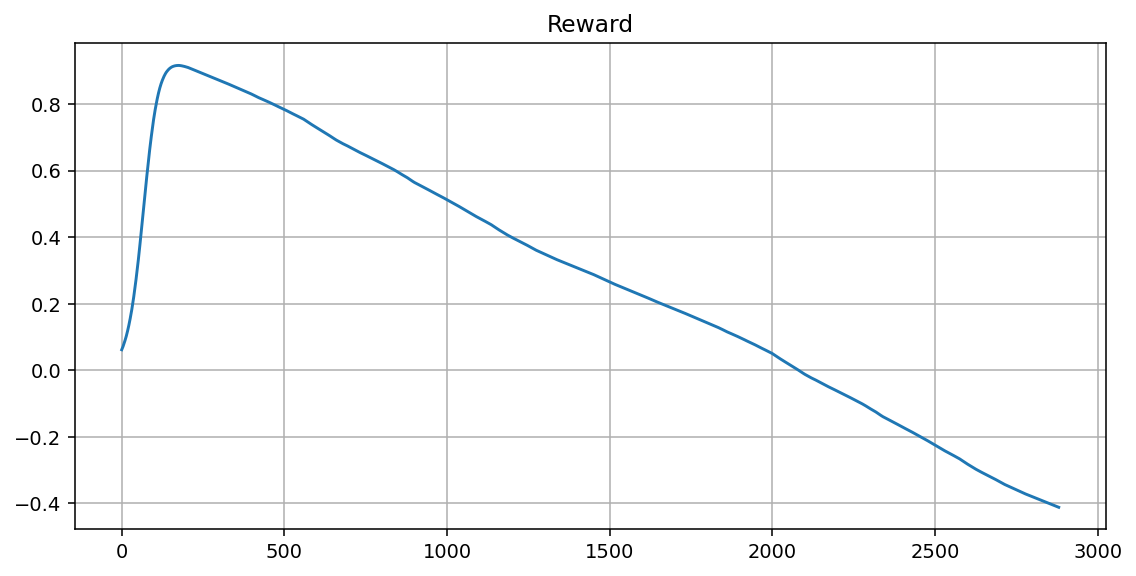

In [11]:
plt.plot(R)
plt.grid()
plt.title("Reward")